# Clasificación de tipo de papers

Sergio David Pérez Navarro

Vamos a realizar un estudio con un número de papers muy límitado (20 papers) con el fin de emplear los distintos tipos de analisis para textos basados en frecuencia y conteo.

In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import classification_report
from scipy.stats import entropy

import numpy as np

mypath = "E:\Documentos\Dropbox\BD\miguel2\papers\\"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

papers = []
tfidf = []
#clases = ["C","A","C","C","L","C","C","L","L","L","L","L","C","A","L","C","L","C","L","A"] #"Arte, Letras, Ciencia"
clases = ["C","L","C","C","L","C","C","L","L","L","L","L","C","L","L","C","L","C","L","L"] #
n_clases = list(map(lambda x: 1 if x == 'C' else 0, clases))
         
         
for file in onlyfiles:
    f = open(mypath + str(file))
    lines = f.read()
    str_text = str(lines)
    str_lines = re.sub(" +", " ", str_text).strip().replace(",","").replace("\\","").replace("-","").replace("'s","")
    str_lines = re.sub("[0-9]+", "", str_lines).replace("\n", "").replace(". ",".")
    str_lines = re.sub(" +", " ", str_lines)
    str_lines = str_lines[:str_lines.find("PROGRAM")].strip().lower()
    papers.append(str_lines)

Una vez tenemos los datos cargados, procedemos con el análisis de texto y clasificación

<IPython.core.display.Javascript object>


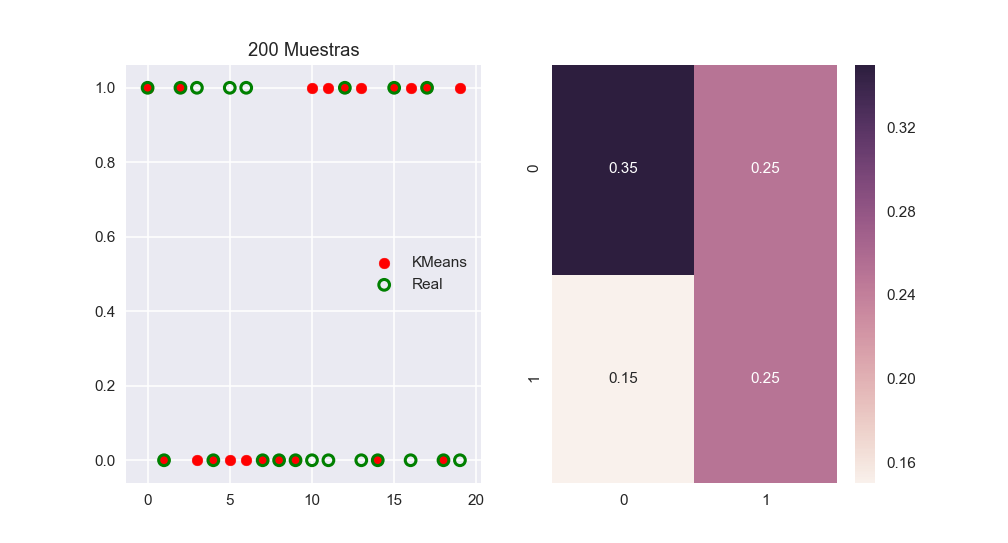

             precision    recall  f1-score   support

          0       0.70      0.58      0.64        12
          1       0.50      0.62      0.56         8

avg / total       0.62      0.60      0.60        20



<IPython.core.display.Javascript object>


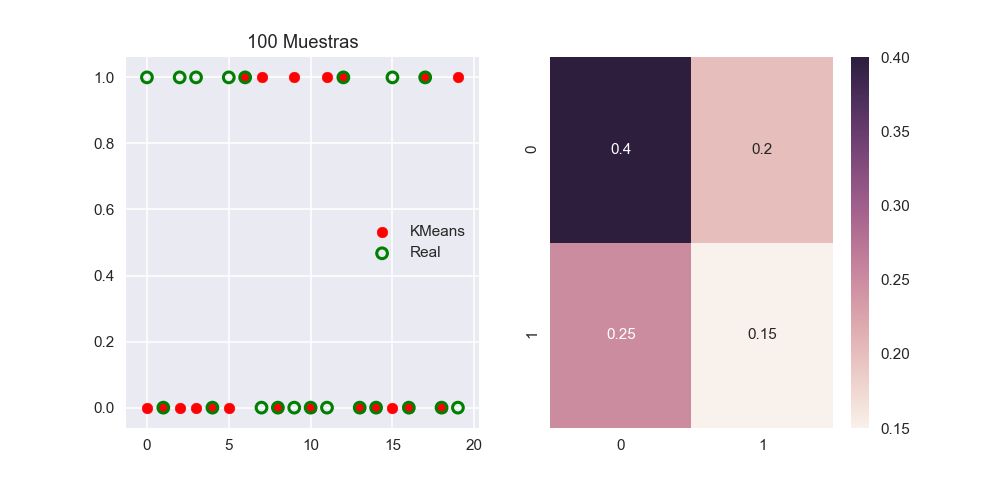

             precision    recall  f1-score   support

          0       0.62      0.67      0.64        12
          1       0.43      0.38      0.40         8

avg / total       0.54      0.55      0.54        20



<IPython.core.display.Javascript object>


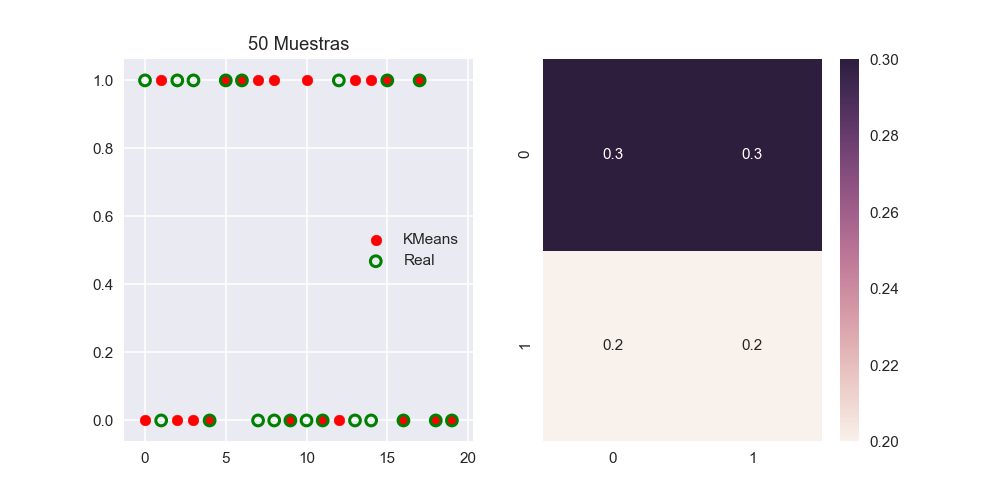

             precision    recall  f1-score   support

          0       0.60      0.50      0.55        12
          1       0.40      0.50      0.44         8

avg / total       0.52      0.50      0.51        20



In [17]:
from sklearn import cluster
from sklearn import manifold
from sklearn import metrics
import seaborn as sns
%matplotlib notebook


Tfid = TfidfVectorizer() #Preparamos el Vectorizador
vec = Tfid.fit_transform(papers)
#vec = CountVectorizer().fit_transform(papers)
#vec = TfidfTransformer().fit_transform(vec)
mat = vec.toarray()
mat = mat[:]
feature_names = Tfid.get_feature_names()
df_mat = pd.DataFrame(mat, columns=feature_names, index=onlyfiles)

entropias = entropy(mat)
pd.Series(entropias)
orden = np.argsort(entropias)
mat[0,orden]
words_entropy = np.array(feature_names)[orden]
df_mat_entropy = pd.DataFrame(mat[:,orden], columns = words_entropy, index=onlyfiles) #Creamos la matriz y df ya vectorizada

random = 6

#Entrenamos los distintos árboles

Train = df_mat_entropy.iloc[:,:200]
Train = manifold.TSNE().fit_transform(Train)

km = cluster.KMeans(n_clusters = 2, max_iter = 1000, algorithm="full", random_state=random)
y = km.fit_predict(Train)
plt.figure()
plt.subplot(121)
plt.title("200 Muestras")
plt.scatter(np.arange(len(y)), y, color="red", label="KMeans")
plt.scatter(np.arange(len(n_clases)), n_clases, edgecolors="green", facecolors='none', linewidths=2, label = "Real")
plt.legend(loc='best')
plt.subplot(122)
sns.heatmap(metrics.confusion_matrix(n_clases,y)/len(n_clases), annot=True)
print(metrics.classification_report(n_clases, y))
plt.show()


Train = df_mat_entropy.iloc[:,:100]
Train = manifold.TSNE().fit_transform(Train)

km = cluster.KMeans(n_clusters = 2, max_iter = 1000, algorithm="full", random_state=random)
y = km.fit_predict(Train)
plt.figure()
plt.subplot(121)
plt.title("100 Muestras")
plt.scatter(np.arange(len(y)), y, color="red", label="KMeans")
plt.scatter(np.arange(len(n_clases)), n_clases, edgecolors="green", facecolors='none', linewidths=2, label = "Real")
plt.legend(loc='best')
plt.subplot(122)
sns.heatmap(metrics.confusion_matrix(n_clases,y)/len(n_clases), annot=True)
print(metrics.classification_report(n_clases, y))
plt.show()


Train = df_mat_entropy.iloc[:,:50]
Train = manifold.TSNE().fit_transform(Train)


km = cluster.KMeans(n_clusters = 2, max_iter = 1000, algorithm="full", random_state=random)
y = km.fit_predict(Train)
plt.figure()
plt.subplot(121)
plt.title("50 Muestras")
plt.scatter(np.arange(len(y)), y, color="red", label="KMeans")
plt.scatter(np.arange(len(n_clases)), n_clases, edgecolors="green", facecolors='none', linewidths=2, label = "Real")
plt.legend(loc='best')
plt.subplot(122)
sns.heatmap(metrics.confusion_matrix(n_clases,y)/len(n_clases), annot=True)
print(metrics.classification_report(n_clases, y))
plt.show()

En este caso hemos realizado una extracción de variables mediante un Manifold TSNE. 
Después de seleccionar tres grupos diferentes con la diferencia en el número de muestras. Estas muestras o palabras han sido seleccionadas empleando un orden basado en entropía. Existen pocas diferencias en muchas de las palabras si empleamos la entropía, es muy posible que se pueda lograr una mejora empleando otro tipo de diferenciador en la cantidad de la información.
Por lo general el sistema no mejora notablemente a partir de unas 200 palabras, si es cierto que en ocasiones hay resultados muy dispares. No hay que olvidar que disponemos de muy pocos casos de entrenamiento.

In [26]:
pd.Series(entropias[orden], index = feature_names)

abound             0.000000
about              0.000000
abroad             0.000000
academic           0.000000
accelerator        0.000000
accounting         0.000000
accreditation      0.000000
accredited         0.000000
acting             0.000000
active             0.000000
activities         0.000000
actuarial          0.000000
addition           0.000000
administration     0.000000
advanced           0.000000
advised            0.000000
advisor            0.000000
advisorbased       0.000000
african            0.000000
africanamerican    0.000000
agencies           0.000000
air                0.000000
all                0.000000
along              0.000000
also               0.000000
alternative        0.000000
although           0.000000
american           0.000000
an                 0.000000
ancient            0.000000
                     ...   
urban              1.724793
use                1.740628
using              1.741020
van                1.774709
variety            1